In [34]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df=df.head(200)

In [7]:
#getting column information
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
#Check for missing data
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#Show some statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,200.000000,200.000000,200.000000
mean,0.125000,32.090000,64.185750
std,0.331549,24.922834,30.350547
min,0.000000,1.000000,18.950000
25%,0.000000,8.000000,30.350000
50%,0.000000,28.500000,69.700000
75%,0.000000,56.000000,89.937500
max,1.000000,72.000000,113.250000


In [11]:
#how many people are churning
df['Churn'].value_counts()

No     151
Yes     49
Name: Churn, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

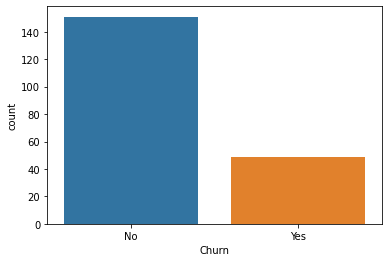

In [14]:
#visualize the count of customer churn
sns.countplot(df['Churn'])

In [18]:
#What is the percentage of customer that are leaving
num_retained=df[df.Churn=='No'].shape[0]
num_churned=df[df.Churn=='Yes'].shape[0]

print(num_retained/(num_retained+num_churned)*100,'% customer retained the company')
print(num_churned/(num_retained+num_churned)*100,'% customer churned the company')

75.5 % customer retained the company
24.5 % customer churned the company


<AxesSubplot:xlabel='gender', ylabel='count'>

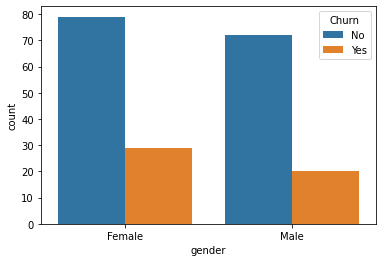

In [19]:
#Visualize the churn count for both males and femals
sns.countplot(x='gender',hue='Churn',data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

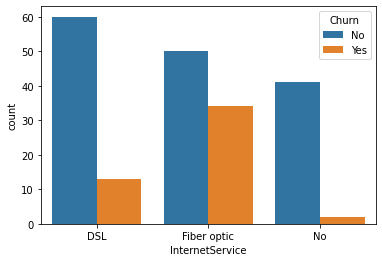

In [22]:
#Visualize the churn count for the internet service
sns.countplot(x='InternetService',hue='Churn',data=df)

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>], dtype=object)

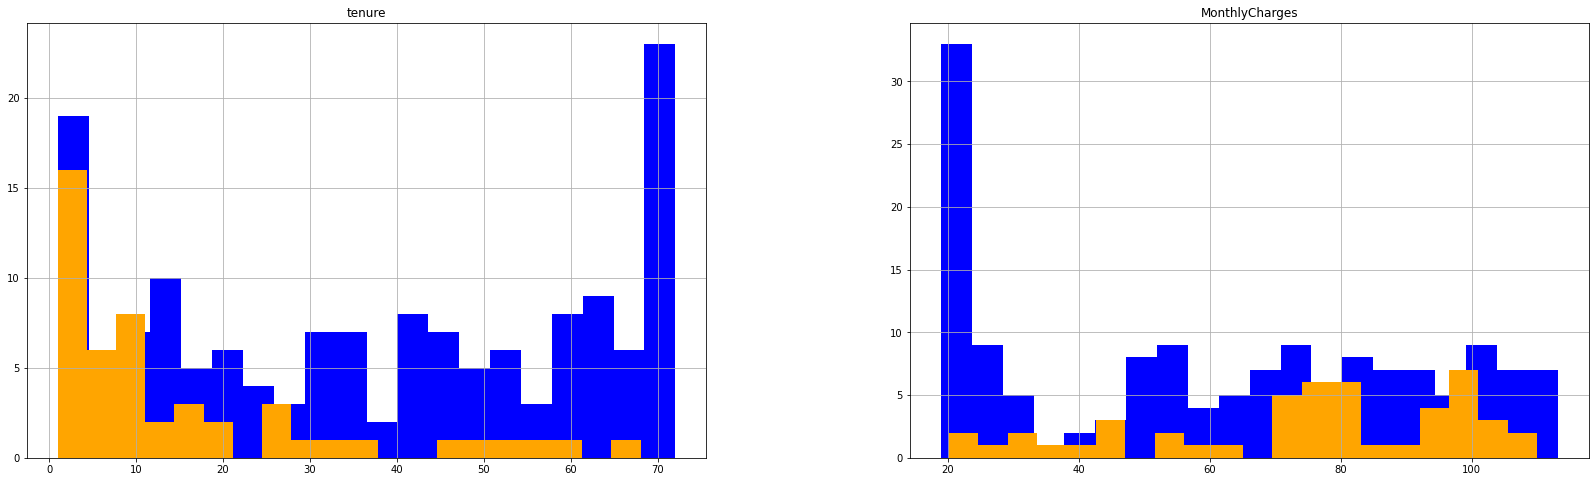

In [25]:
numerical_features=['tenure','MonthlyCharges']
fig,ax=plt.subplots(1,2,figsize=(28,8))
df[df.Churn=='No'][numerical_features].hist(bins=20,color='blue',ax=ax)
df[df.Churn=='Yes'][numerical_features].hist(bins=20,color='orange',ax=ax)


In [27]:
#Remove unnecessary columns
clean_df=df.drop('customerID',axis=1)

In [30]:
clean_df.shape

(200, 20)

In [36]:
#Convert all the non-numeric to numeric
for column in clean_df.columns:
    if clean_df[column].dtype==np.number:
        continue
    clean_df[column]=LabelEncoder().fit_transform(clean_df[column])

<ipython-input-36-c0db9bd16d27>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if clean_df[column].dtype==np.number:


In [37]:
#show the new data set data type
clean_df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [39]:
#first five row of the dataset
clean_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,83,0
1,1,0,0,0,31,1,0,0,2,0,2,0,0,0,1,0,3,56.95,51,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,53.85,8,1
3,1,0,0,0,40,0,1,0,2,0,2,2,0,0,1,0,0,42.30,48,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.70,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,1,0,18,1,0,1,2,2,0,2,2,0,0,1,2,96.55,54,0
196,1,0,1,1,22,1,2,2,1,1,1,1,1,1,2,1,0,24.10,148,0
197,1,0,0,0,52,1,2,1,0,2,2,2,2,2,0,1,2,111.35,160,0
198,1,0,1,1,65,1,2,1,0,2,2,2,2,2,2,1,0,112.25,181,0


In [41]:
#Scaled the data
x=clean_df.drop('Churn',axis=1)#feature data dataset

#target column
y=clean_df['Churn']

In [42]:
x=StandardScaler().fit_transform(x)

In [49]:
#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [50]:
#Create the model
model=LogisticRegression()
#Train the model
model.fit(x_train,y_train)

LogisticRegression()

In [51]:
#Create the predictions on the test data
prediction=model.predict(x_test)
#print the prediction
print(prediction)

[1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0]


In [52]:
#Check the precision recall, fi_score
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.57      0.57      0.57         7

    accuracy                           0.85        40
   macro avg       0.74      0.74      0.74        40
weighted avg       0.85      0.85      0.85        40

